<a href="https://www.kaggle.com/code/pragyamukherjee/crime-knn?scriptVersionId=110968531" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("../input/sfcrime/train.csv/train.csv")[["DayOfWeek", "PdDistrict",'X', 'Y', 'Category']]

train_data

,DayOfWeek,PdDistrict,X,Y,Category
0,Wednesday,NORTHERN,-122.425892,37.774599,WARRANTS
1,Wednesday,NORTHERN,-122.425892,37.774599,OTHER OFFENSES
2,Wednesday,NORTHERN,-122.424363,37.800414,OTHER OFFENSES
3,Wednesday,NORTHERN,-122.426995,37.800873,LARCENY/THEFT
4,Wednesday,PARK,-122.438738,37.771541,LARCENY/THEFT
...,...,...,...,...,...
878044,Monday,TARAVAL,-122.459033,37.714056,ROBBERY
878045,Monday,INGLESIDE,-122.447364,37.731948,LARCENY/THEFT
878046,Monday,SOUTHERN,-122.403390,37.780266,LARCENY/THEFT
878047,Monday,SOUTHERN,-122.390531,37.780607,VANDALISM


In [3]:
train_data.head(10)

,DayOfWeek,PdDistrict,X,Y,Category
0,Wednesday,NORTHERN,-122.425892,37.774599,WARRANTS
1,Wednesday,NORTHERN,-122.425892,37.774599,OTHER OFFENSES
2,Wednesday,NORTHERN,-122.424363,37.800414,OTHER OFFENSES
3,Wednesday,NORTHERN,-122.426995,37.800873,LARCENY/THEFT
4,Wednesday,PARK,-122.438738,37.771541,LARCENY/THEFT
5,Wednesday,INGLESIDE,-122.403252,37.713431,LARCENY/THEFT
6,Wednesday,INGLESIDE,-122.423327,37.725138,VEHICLE THEFT
7,Wednesday,BAYVIEW,-122.371274,37.727564,VEHICLE THEFT
8,Wednesday,RICHMOND,-122.508194,37.776601,LARCENY/THEFT
9,Wednesday,CENTRAL,-122.419088,37.807802,LARCENY/THEFT


In [4]:
from sklearn.preprocessing import LabelEncoder
train_data["Category"] = train_data["Category"].to_frame()
le = LabelEncoder()
train_data["Category"] = le.fit_transform(train_data["Category"])
data_week_dict = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
train_data["DayOfWeek"] = train_data["DayOfWeek"].replace(data_week_dict)
#District
district = train_data["PdDistrict"].unique()
data_dict_district = {}
count = 1
for data in district:
    data_dict_district[data] = count
    count+=1 
train_data["PdDistrict"] = train_data["PdDistrict"].replace(data_dict_district)

In [5]:
train_data.shape

(878049, 5)

In [6]:
train_data.isnull().sum()

DayOfWeek     0
PdDistrict    0
X             0
Y             0
Category      0
dtype: int64

In [7]:
train_data.describe()

,DayOfWeek,PdDistrict,X,Y,Category
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,3.992691,6.037957,-122.422616,37.771020,19.338687
std,1.972023,3.114945,0.030354,0.456893,10.688637
min,1.000000,1.000000,-122.513642,37.707879,0.000000
25%,2.000000,3.000000,-122.432952,37.752427,16.000000
50%,4.000000,6.000000,-122.416420,37.775421,20.000000
75%,6.000000,9.000000,-122.406959,37.784369,25.000000
max,7.000000,10.000000,-120.500000,90.000000,38.000000


In [8]:
train_data.isnull()

,DayOfWeek,PdDistrict,X,Y,Category
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
878044,False,False,False,False,False
878045,False,False,False,False,False
878046,False,False,False,False,False
878047,False,False,False,False,False


In [9]:
X = train_data.iloc[:,0:-1].values
X

array([[   3.        ,    1.        , -122.42589168,   37.7745986 ],
       [   3.        ,    1.        , -122.42589168,   37.7745986 ],
       [   3.        ,    1.        , -122.42436302,   37.80041432],
       ...,
       [   1.        ,   10.        , -122.40339036,   37.78026558],
       [   1.        ,   10.        , -122.3905314 ,   37.78060708],
       [   1.        ,    4.        , -122.39492572,   37.73821154]])

In [10]:
y = train_data.iloc[:,-1].values

In [11]:
train_data["Category"].unique()

array([37, 21, 16, 36, 35, 20, 25,  1, 38,  4, 32,  8, 12,  7, 30, 27, 34,
       19, 13, 15, 26,  6, 28, 23,  5,  0, 11, 17,  3,  9, 31, 18, 29, 10,
       14,  2, 33, 24, 22])

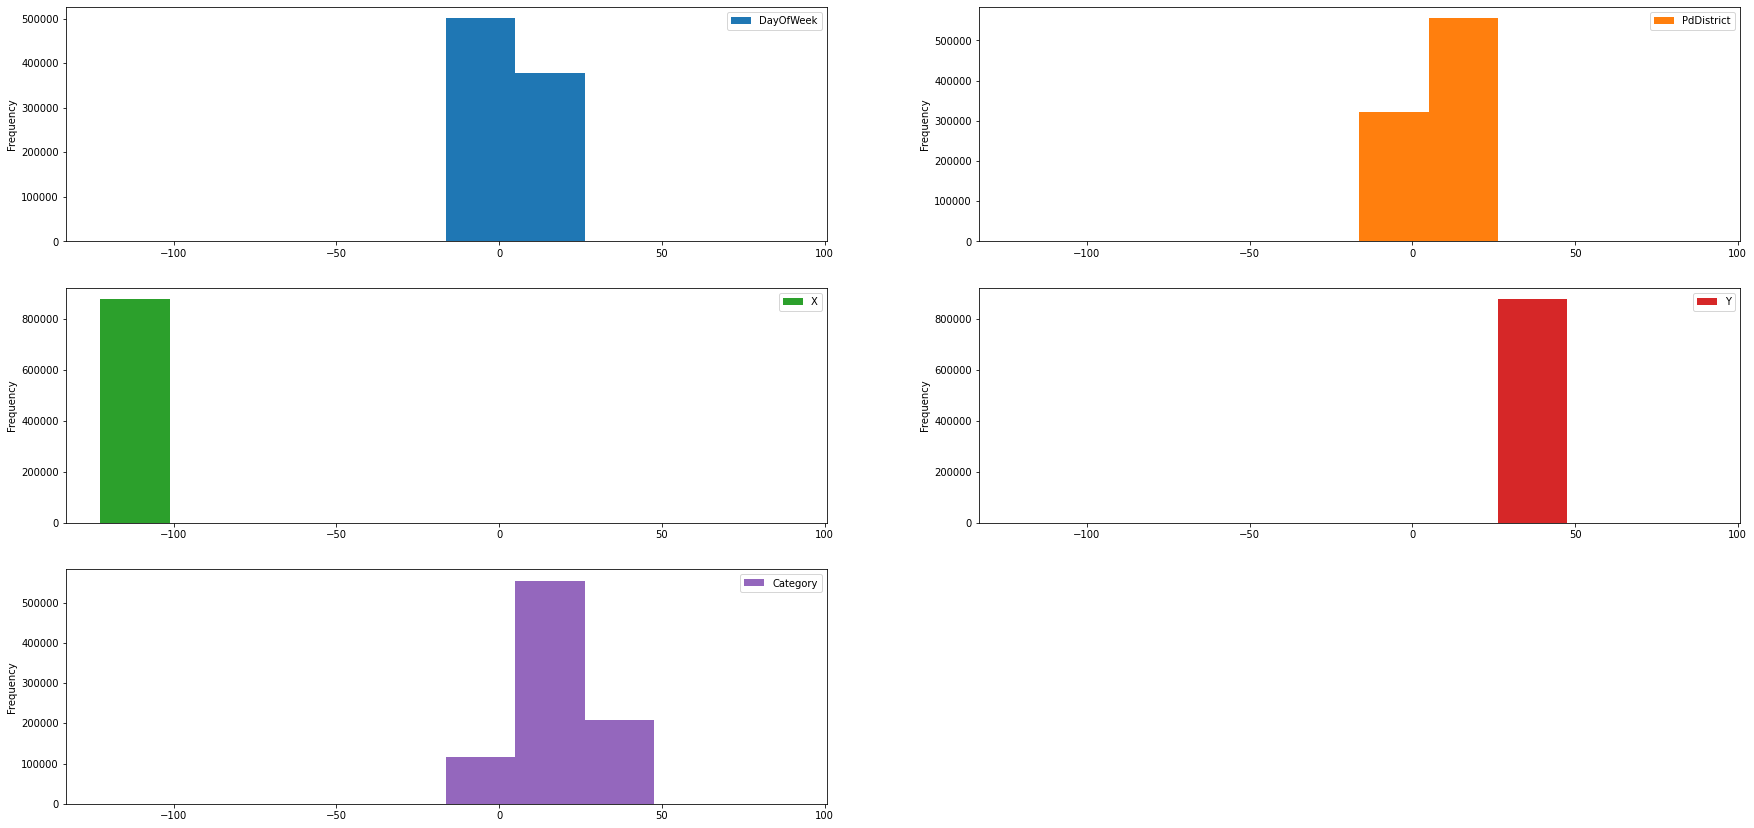

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(30,25)
train_data.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

0.22271118339232757

<AxesSubplot:>

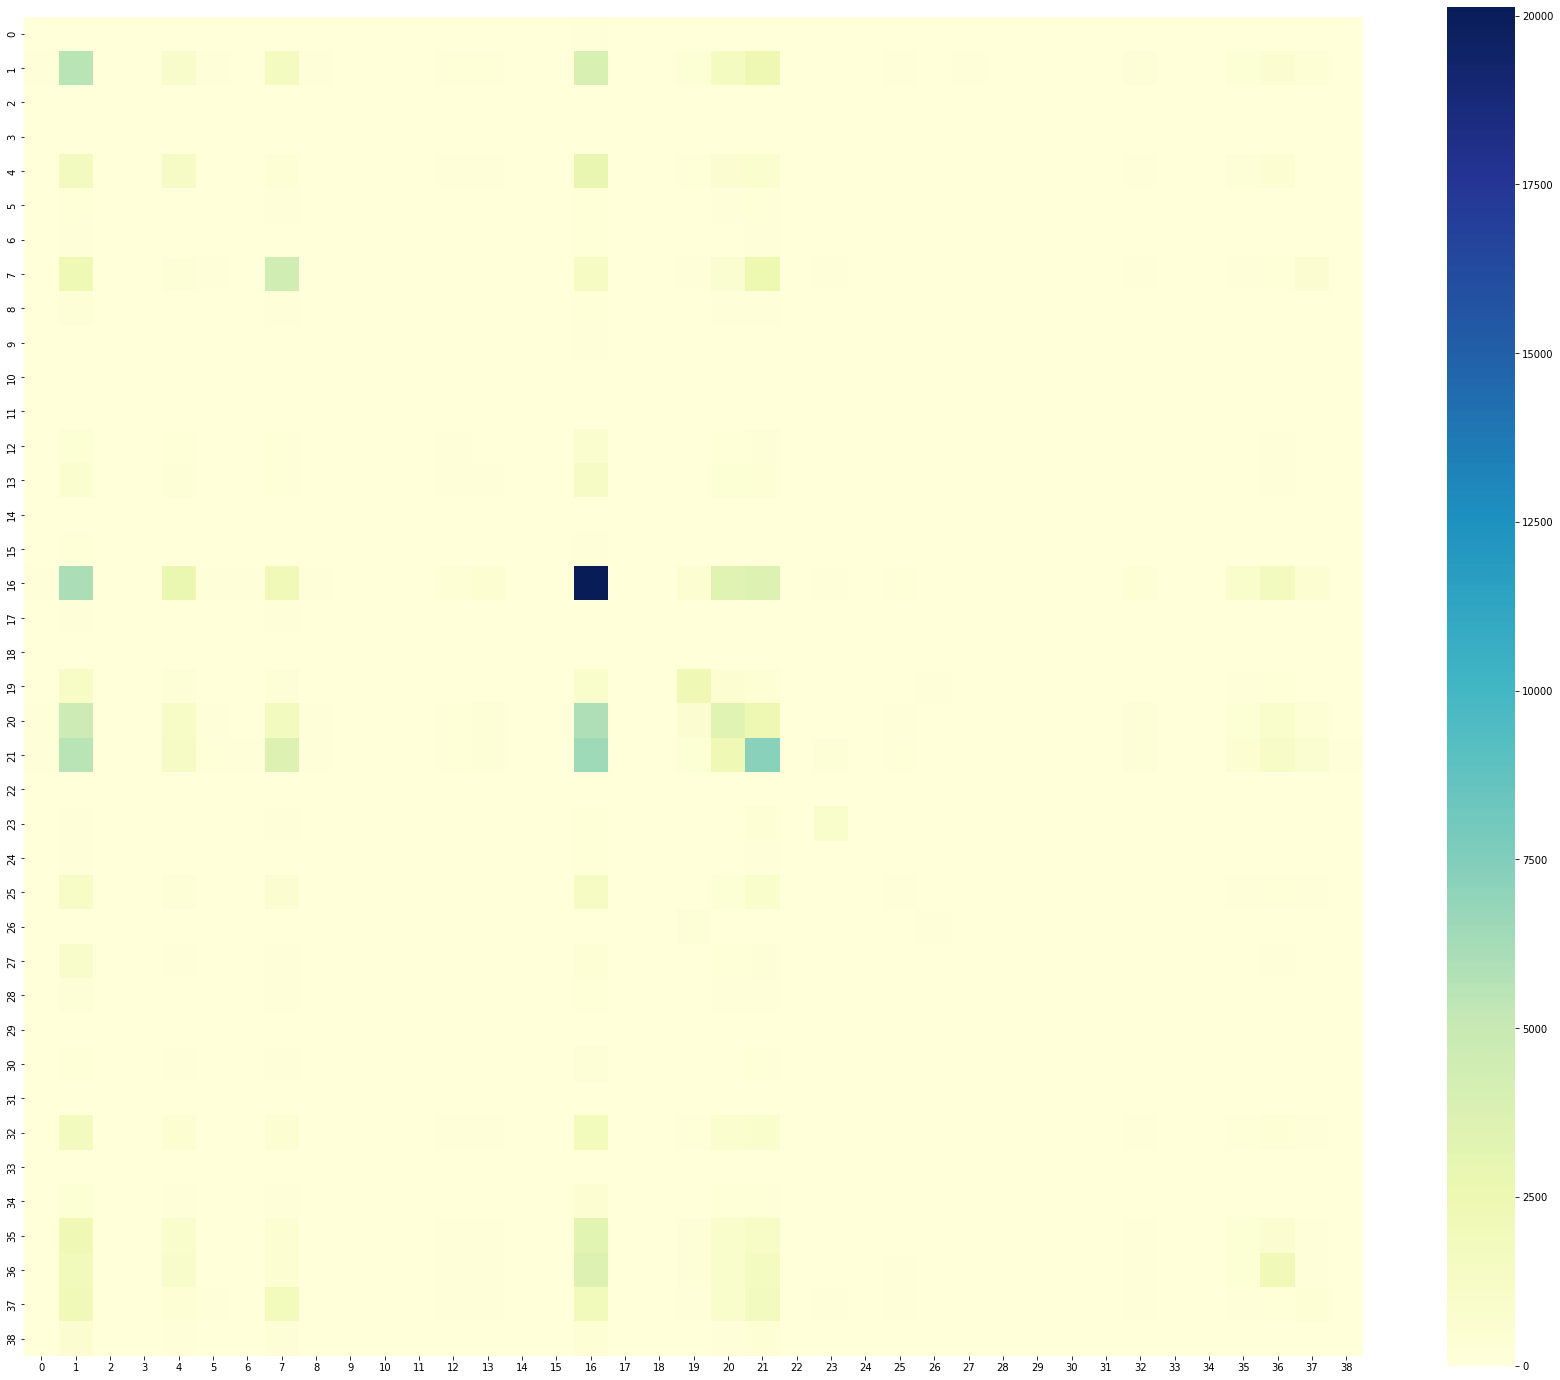

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns  
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
sns.heatmap(cm, cmap="YlGnBu", square=True)

In [17]:
print(classification_report(y_test, y_pred))  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.01      0.02      0.01       382
           1       0.13      0.29      0.18     19231
           2       0.00      0.00      0.00        89
           3       0.00      0.00      0.00        72
           4       0.10      0.14      0.12      9247
           5       0.03      0.04      0.03      1018
           6       0.01      0.01      0.01       585
           7       0.23      0.33      0.27     13457
           8       0.03      0.02      0.02      1076
           9       0.02      0.01      0.02       274
          10       0.00      0.00      0.00        58
          11       0.00      0.00      0.00       106
          12       0.07      0.05      0.06      2604
          13       0.04      0.03      0.03      4036
          14       0.00      0.00      0.00        43
          15       0.01      0.01      0.01       549
          16       0.34      0.46      0.39     43883
          17       0.02    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[   9   77    0 ...   32    5    4]
 [ 116 5571   14 ...  598  392   59]
 [   0   18    0 ...    4    2    0]
 ...
 [  65 2038    5 ... 2047  134   24]
 [  34 2076    3 ...  211  382   24]
 [  18  563    3 ...   52   61   30]]
